In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("C:\Phthon\python_son.csv")

In [21]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [23]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

## Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

In [24]:
df["organization_country"].value_counts().head(10)

organization_country
United States of America               341
United Kingdom                          89
Germany                                 43
France                                  36
Federal Republic of Germany             23
Switzerland                             21
Sweden                                  17
Japan                                   16
Netherlands                             11
Union of Soviet Socialist Republics      9
Name: count, dtype: int64

## Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

In [25]:
df_kadin = df[df["sex"] == "Female"]

In [26]:
min_years=df_kadin.groupby("organization_country")[["year"]].min()

In [27]:
min_years

,year
organization_country,
China,2015
Federal Republic of Germany,1995
France,1911
Israel,2009
Italy,1986
Norway,2014
United Kingdom,1964
United States of America,1947


In [28]:
result_kadin = pd.merge(min_years, df_kadin, on=["organization_country", "year"], how="left")

In [29]:
result_kadin[["organization_country","year","full_name"]]

,organization_country,year,full_name
0,China,2015,Youyou Tu
1,Federal Republic of Germany,1995,Christiane Nüsslein-Volhard
2,France,1911,"Marie Curie, née Sklodowska"
3,Israel,2009,Ada E. Yonath
4,Italy,1986,Rita Levi-Montalcini
5,Norway,2014,May-Britt Moser
6,United Kingdom,1964,Dorothy Crowfoot Hodgkin
7,United States of America,1947,"Gerty Theresa Cori, née Radnitz"


## Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

In [30]:
df_erkek = df[df["sex"] == "Male"]

In [31]:
min_years=df_erkek.groupby("organization_country")[["year"]].min()

In [32]:
result_erkek = pd.merge(min_years, df_erkek, on=["organization_country", "year"], how="left")

In [33]:
result_erkek[["organization_country","year","full_name"]]

,organization_country,year,full_name
0,"Alsace (then Germany, now France)",1909,Karl Ferdinand Braun
1,Argentina,1947,Bernardo Alberto Houssay
2,Australia,1960,Sir Frank Macfarlane Burnet
3,Austria,1914,Robert Bárány
4,Belgium,1919,Jules Bordet
5,Canada,1923,Frederick Grant Banting
6,Canada,1923,John James Rickard Macleod
7,Czechoslovakia,1959,Jaroslav Heyrovsky
8,Denmark,1903,Niels Ryberg Finsen
9,Federal Republic of Germany,1950,Otto Paul Hermann Diels


## Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip, bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?

In [34]:
df["organization_country"].value_counts().head(1)

organization_country
United States of America    341
Name: count, dtype: int64

In [35]:
usa = df[df["organization_country"]=="United States of America"]

In [40]:
temp = usa["year"].value_counts()
temp

year
2001    9
1990    9
2004    8
2000    8
1998    8
       ..
1949    1
1953    1
1991    1
1984    1
1907    1
Name: count, Length: 86, dtype: int64

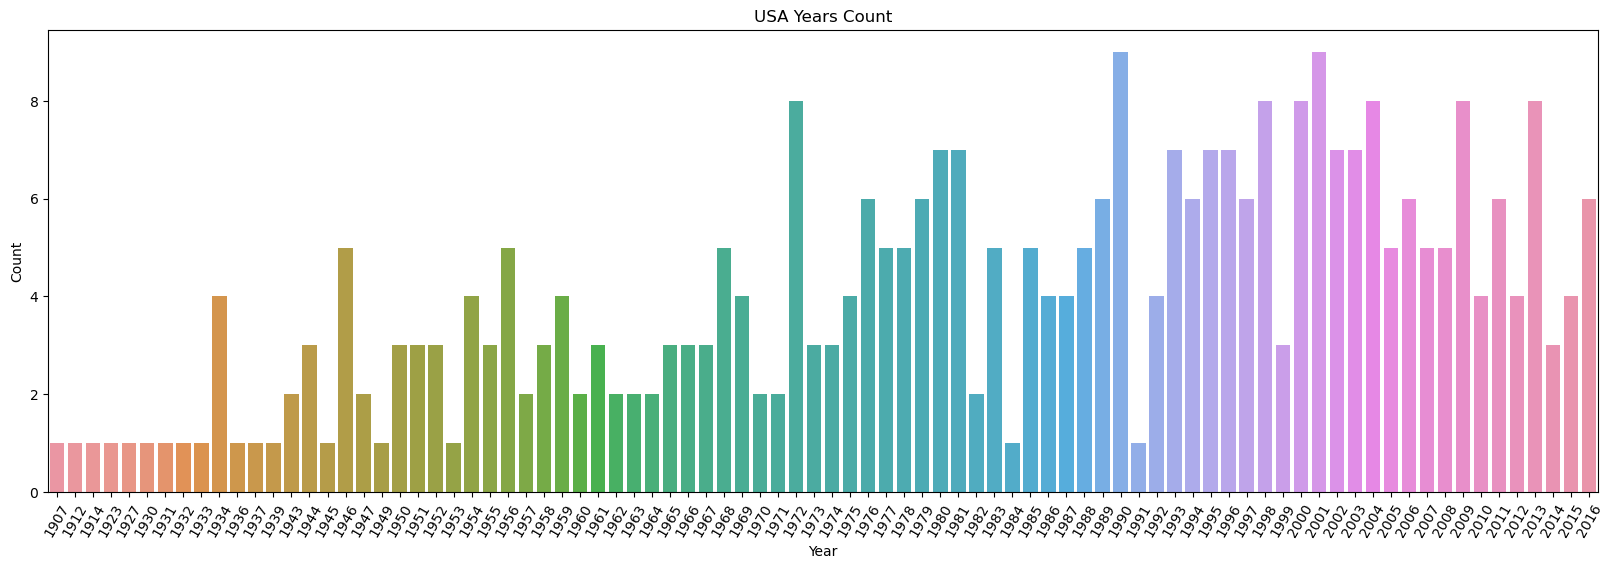

In [37]:
plt.figure(figsize=(20, 6))
sns.barplot(x=temp.index, y=temp.values)

plt.title('USA Years Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.show()

In [39]:
usa["category"].value_counts()

category
Medicine     106
Physics       98
Chemistry     73
Economics     61
Peace          3
Name: count, dtype: int64

In [ ]:
#Yorum: 40'lı yılların ortalarından itibaren pozitif ivmelenme görülmektedir. Birçok sebebi olmakla birlikte en çok ödül alınan
#branş olan tıp alanına baktığımızda sebebi yine yakın yıllarda kurulan  "Amerikan Tıp Okulları Birliği" olabilir.
#İvmelenmenin  sebebi 2. Dünya Savaşının sona ermesi de olabilir.

## Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

In [58]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [59]:
df_data = df[["sex","year","category","birth_date"]]

In [60]:
df_data.head()

,sex,year,category,birth_date
0,Male,1901,Chemistry,1852-08-30
1,Male,1901,Literature,1839-03-16
2,Male,1901,Medicine,1854-03-15
3,Male,1901,Peace,1828-05-08
4,Male,1901,Peace,1822-05-20


In [61]:
df_data.isnull().sum()

sex           26
year           0
category       0
birth_date    28
dtype: int64

In [62]:
df_data = df_data.dropna()

In [84]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 0 to 910
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        883 non-null    int64         
 1   category    883 non-null    object        
 2   birth_date  883 non-null    datetime64[ns]
 3   birth_year  883 non-null    int64         
 4   yas         883 non-null    int64         
 5   Male        883 non-null    int32         
 6   cinsiyet    883 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1)
memory usage: 48.3+ KB


In [64]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [65]:
df_data["birth_year"] = df_data["birth_date"].apply(lambda row : row.year)

In [66]:
df_data["yas"] = df_data["year"] - df_data["birth_year"]

In [67]:
df_data

,sex,year,category,birth_date,birth_year,yas
0,Male,1901,Chemistry,1852-08-30,1852,49
1,Male,1901,Literature,1839-03-16,1839,62
2,Male,1901,Medicine,1854-03-15,1854,47
3,Male,1901,Peace,1828-05-08,1828,73
4,Male,1901,Peace,1822-05-20,1822,79
...,...,...,...,...,...,...
906,Male,2016,Medicine,1945-02-09,1945,71
907,Male,2016,Peace,1951-08-10,1951,65
908,Male,2016,Physics,1934-09-21,1934,82
909,Male,2016,Physics,1951-09-14,1951,65


In [68]:
cinsiyet = pd.get_dummies(df_data["sex"], dtype=int, drop_first=True)

In [69]:
df_data = pd.concat([df_data, cinsiyet], axis=1).drop(["sex"], axis=1)

In [70]:
df_data["cinsiyet"] = df_data["Male"]         # 1 = erkek
df_data

,year,category,birth_date,birth_year,yas,Male,cinsiyet
0,1901,Chemistry,1852-08-30,1852,49,1,1
1,1901,Literature,1839-03-16,1839,62,1,1
2,1901,Medicine,1854-03-15,1854,47,1,1
3,1901,Peace,1828-05-08,1828,73,1,1
4,1901,Peace,1822-05-20,1822,79,1,1
...,...,...,...,...,...,...,...
906,2016,Medicine,1945-02-09,1945,71,1,1
907,2016,Peace,1951-08-10,1951,65,1,1
908,2016,Physics,1934-09-21,1934,82,1,1
909,2016,Physics,1951-09-14,1951,65,1,1


In [71]:
df_data["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [72]:
# Chemistry kategorisi
df_Chemistry = df_data[df_data["category"]== "Chemistry"]
df_Chemistry

,year,category,birth_date,birth_year,yas,Male,cinsiyet
0,1901,Chemistry,1852-08-30,1852,49,1,1
6,1902,Chemistry,1852-10-09,1852,50,1,1
13,1903,Chemistry,1859-02-19,1859,44,1,1
20,1904,Chemistry,1852-10-02,1852,52,1,1
26,1905,Chemistry,1835-10-31,1835,70,1,1
...,...,...,...,...,...,...,...
890,2015,Chemistry,1946-06-13,1946,69,1,1
891,2015,Chemistry,1946-09-08,1946,69,1,1
900,2016,Chemistry,1944-10-21,1944,72,1,1
901,2016,Chemistry,1942-05-24,1942,74,1,1


In [73]:
df_Chemistry = df_Chemistry.drop(["category","birth_date","birth_year","Male"], axis=1)

In [74]:
df_Chemistry

,year,yas,cinsiyet
0,1901,49,1
6,1902,50,1
13,1903,44,1
20,1904,52,1
26,1905,70,1
...,...,...,...
890,2015,69,1
891,2015,69,1
900,2016,72,1
901,2016,74,1


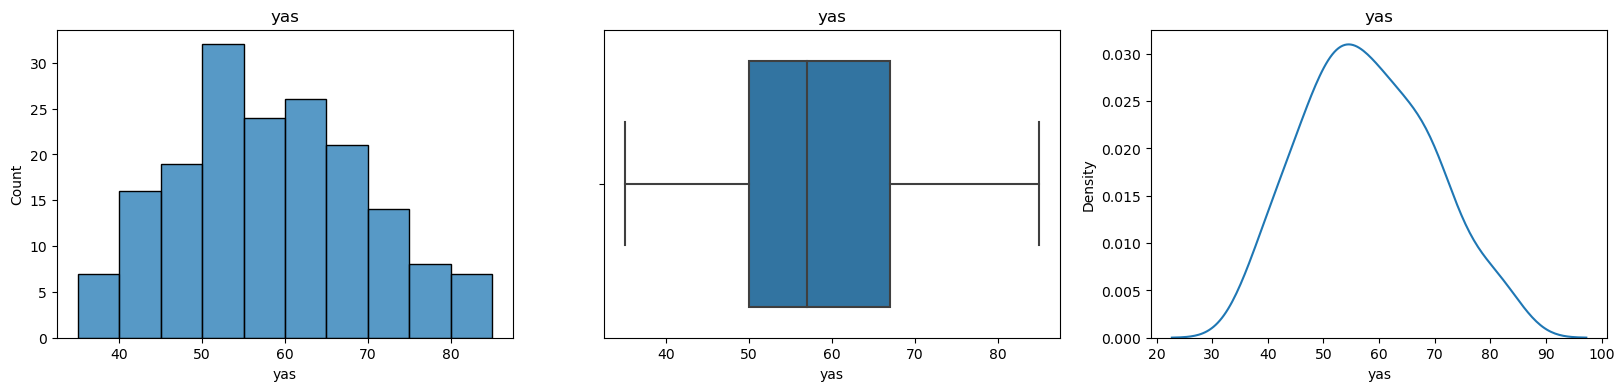

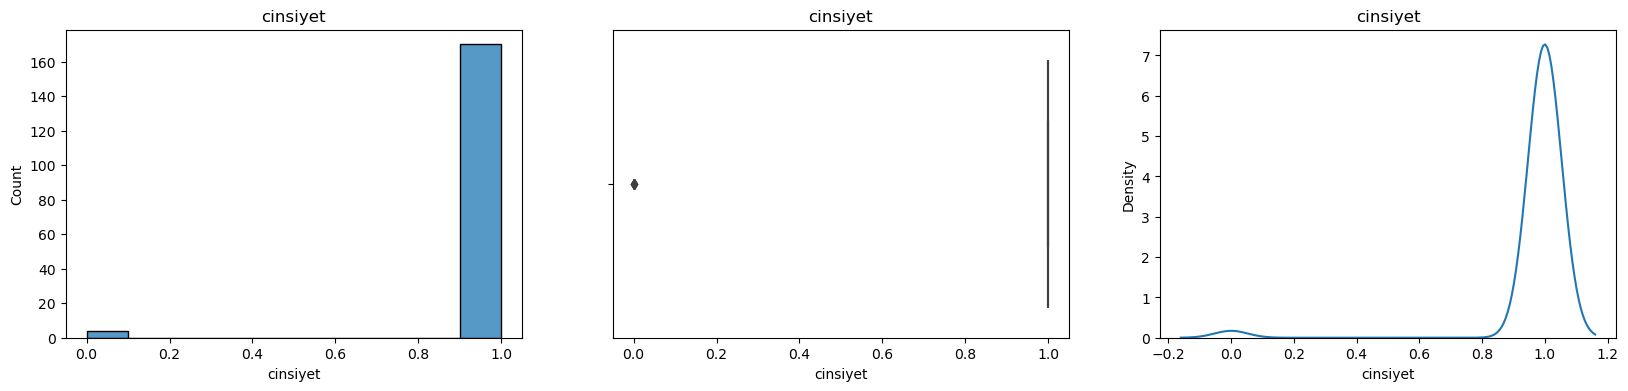

In [75]:
for i in df_Chemistry.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Chemistry[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Chemistry[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Chemistry[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

In [76]:
# Literature kategorisi
df_Literature = df_data[df_data["category"]== "Literature"]

In [77]:
df_Literature = df_Literature.drop(["category","birth_date","birth_year","Male"], axis=1)

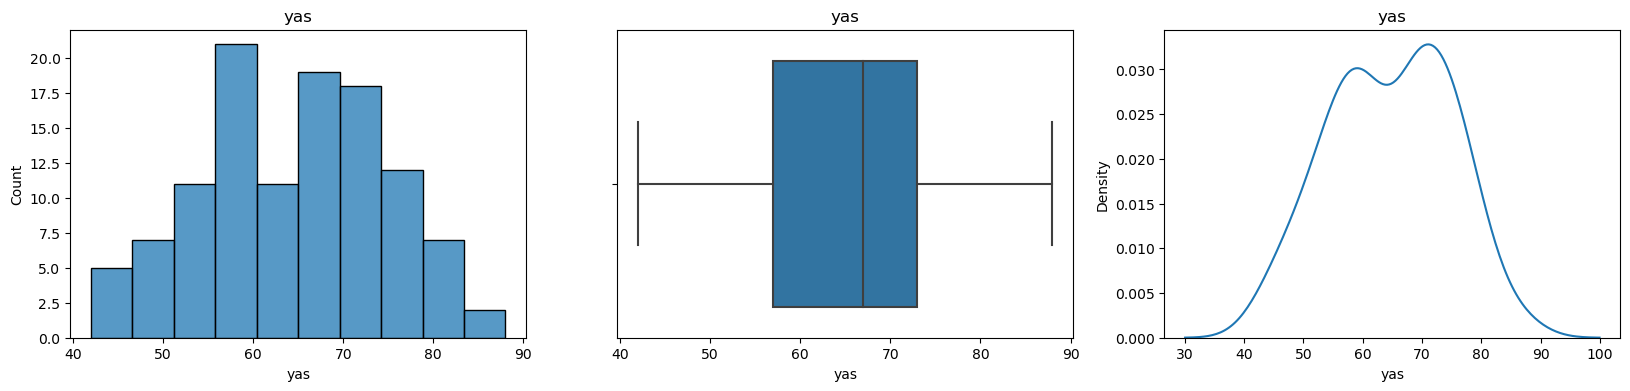

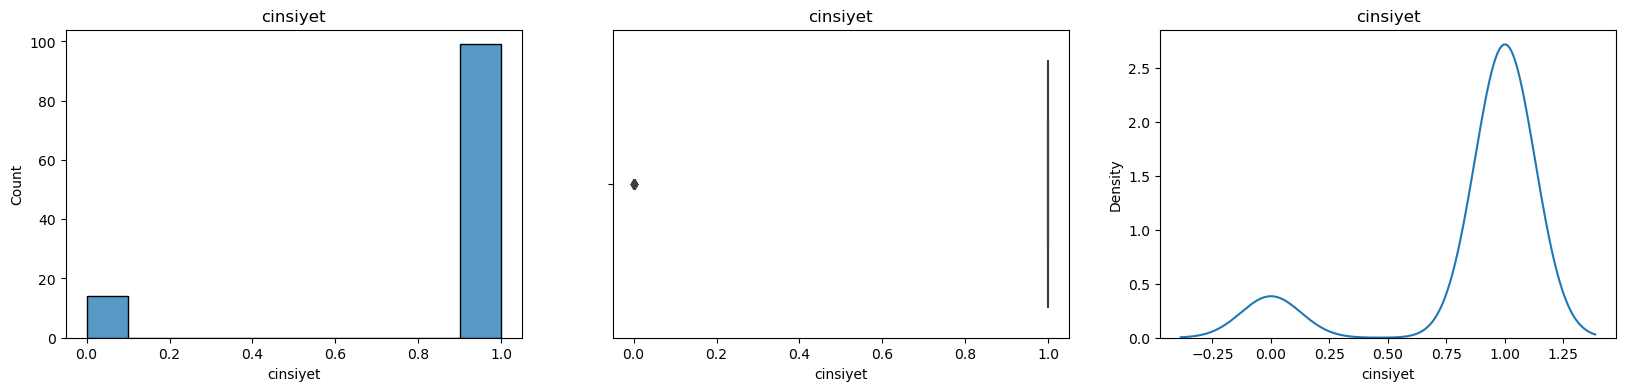

In [78]:
for i in df_Literature.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Literature[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Literature[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Literature[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

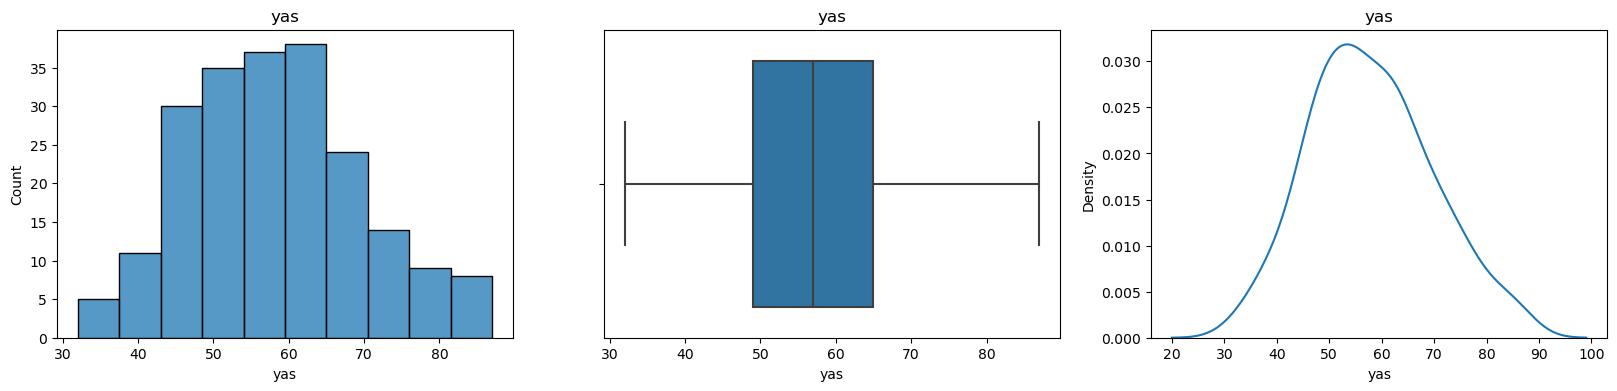

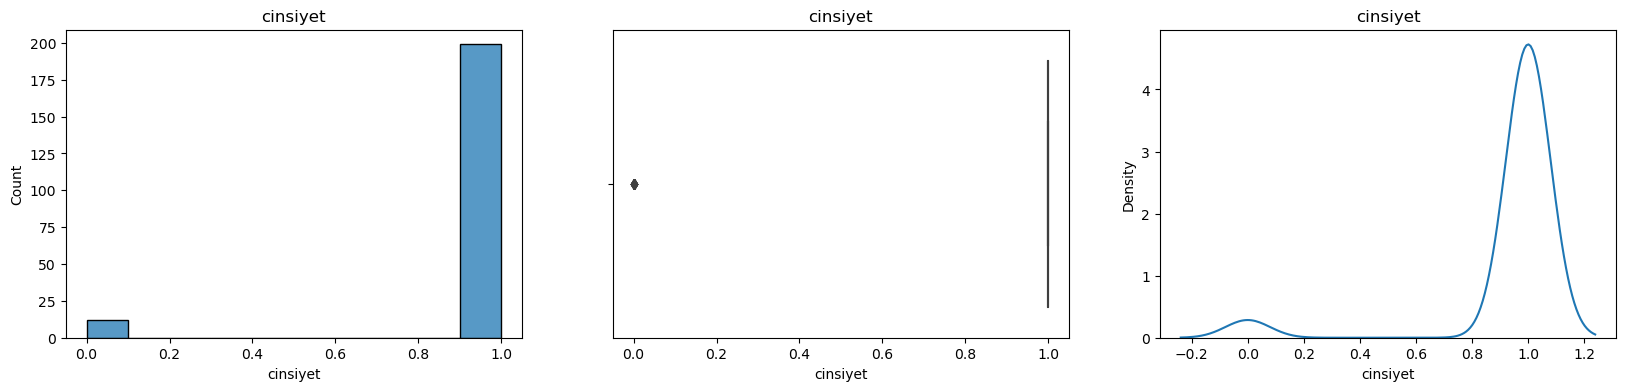

In [79]:
# Medicine kategorisi
df_Medicine = df_data[df_data["category"]== "Medicine"]

df_Medicine = df_Medicine.drop(["category","birth_date","birth_year", "Male"], axis=1)

for i in df_Medicine.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Medicine[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Medicine[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Medicine[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

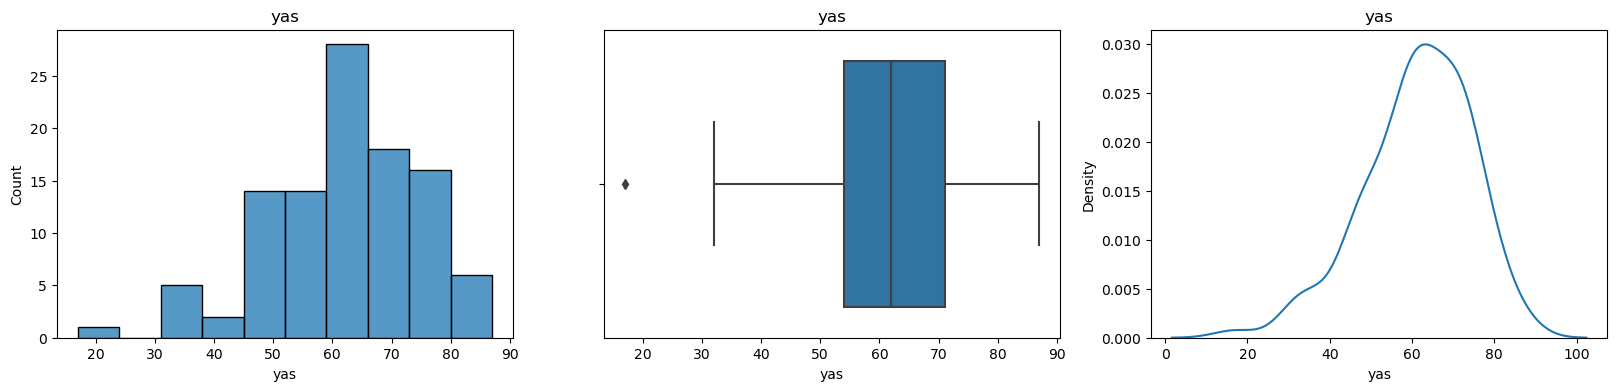

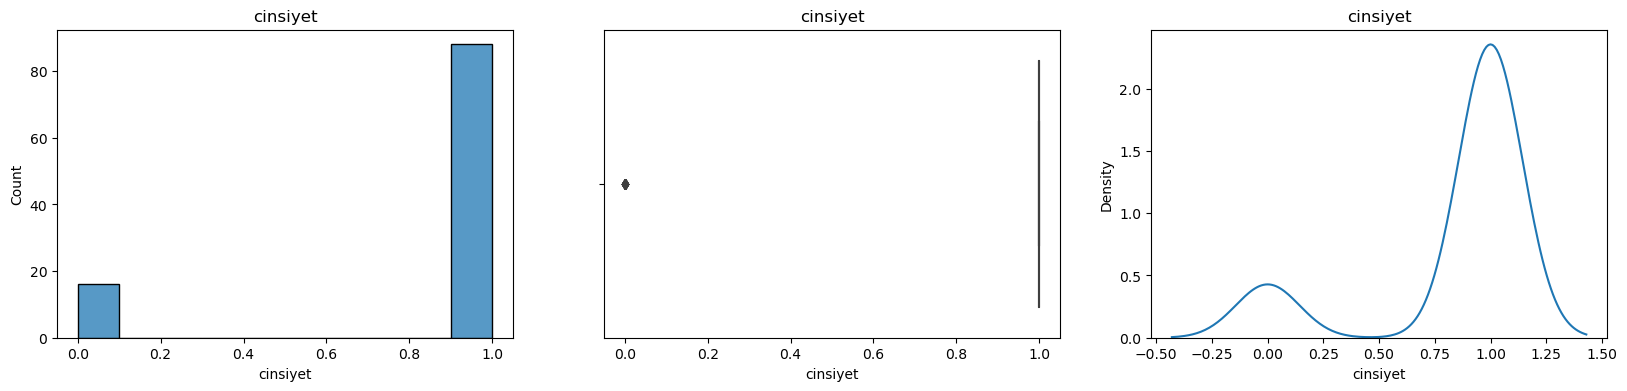

In [81]:
# Peace kategorisi
df_Peace = df_data[df_data["category"]== "Peace"]

df_Peace = df_Peace.drop(["category","birth_date","birth_year", "Male"], axis=1)

for i in df_Peace.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Peace[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Peace[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Peace[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

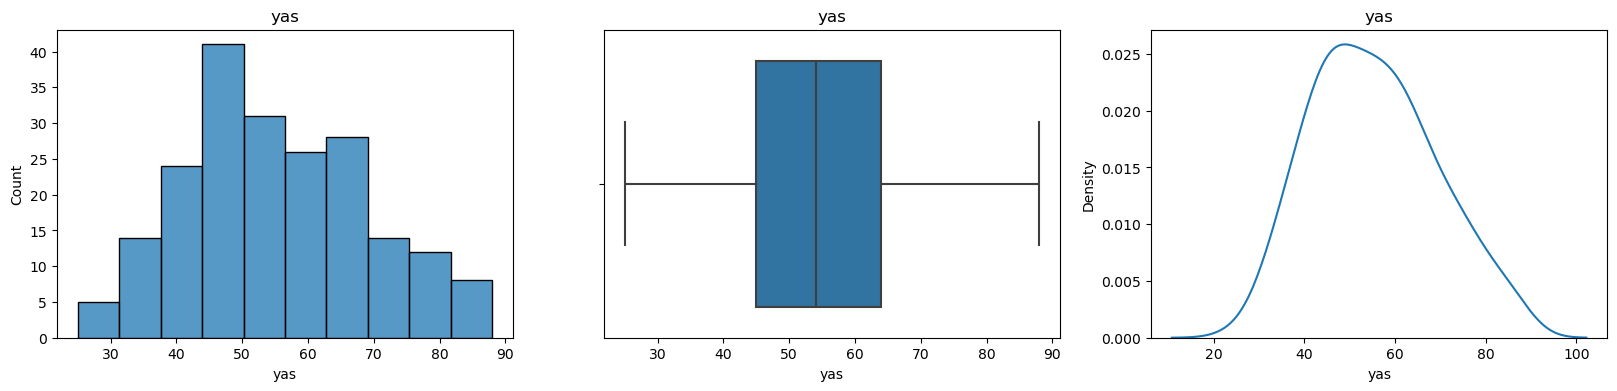

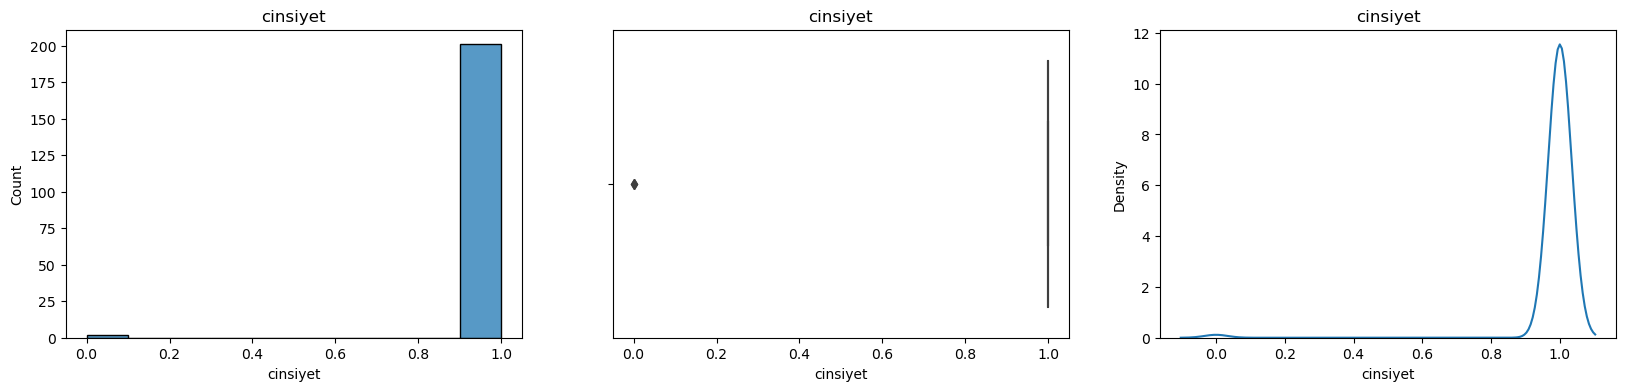

In [82]:
# Physics kategorisi
df_Physics = df_data[df_data["category"]== "Physics"]

df_Physics = df_Physics.drop(["category","birth_date","birth_year","Male"], axis=1)

for i in df_Physics.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Physics[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Physics[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Physics[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

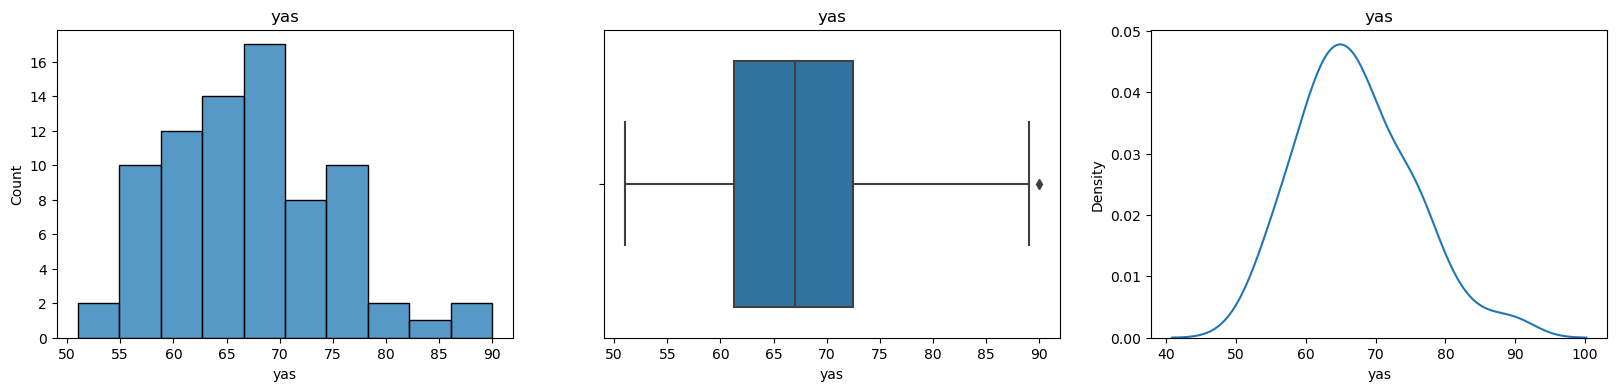

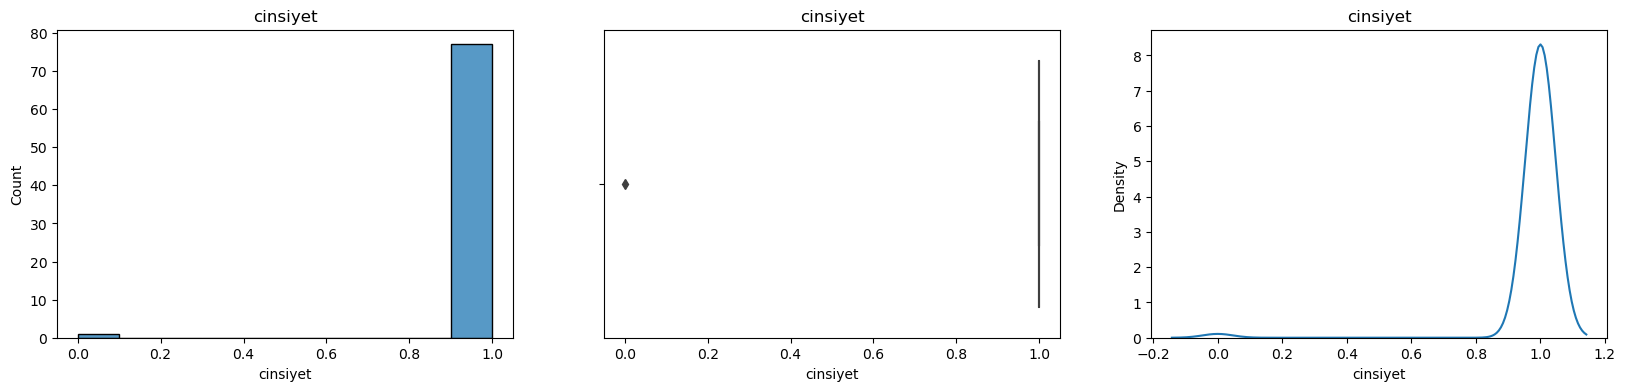

In [83]:
# Economics kategorisi
df_Economics = df_data[df_data["category"]== "Economics"]

df_Economics = df_Economics.drop(["category","birth_date","birth_year","Male"], axis=1)

for i in df_Economics.columns[1:]:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
        sns.histplot(x = df_Economics[i], bins= 10, ax=axes[0])
        axes[0].set_title(i)

        sns.boxplot(x = df_Economics[i], ax=axes[1])
        axes[1].set_title(i)

        sns.kdeplot(x = df_Economics[i], ax=axes[2])
        axes[2].set_title(i)
        plt.show()

## 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

In [85]:
df_yeni = df[(df["year"]>=1938) & (df["year"]<=1945)]

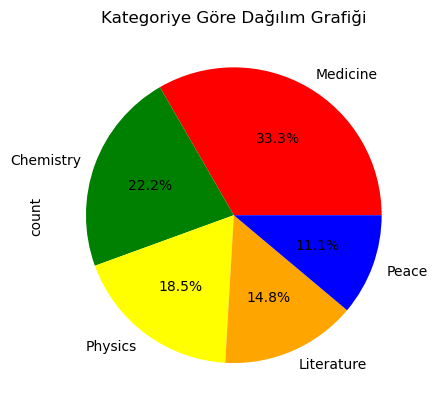

In [86]:
# Kategoriye göre dağılım grafiği
df_yeni['category'].value_counts().plot(kind='pie', autopct="%1.1f%%", colors=['red','green','yellow','orange', 'blue'])
plt.title('Kategoriye Göre Dağılım Grafiği')
plt.show()

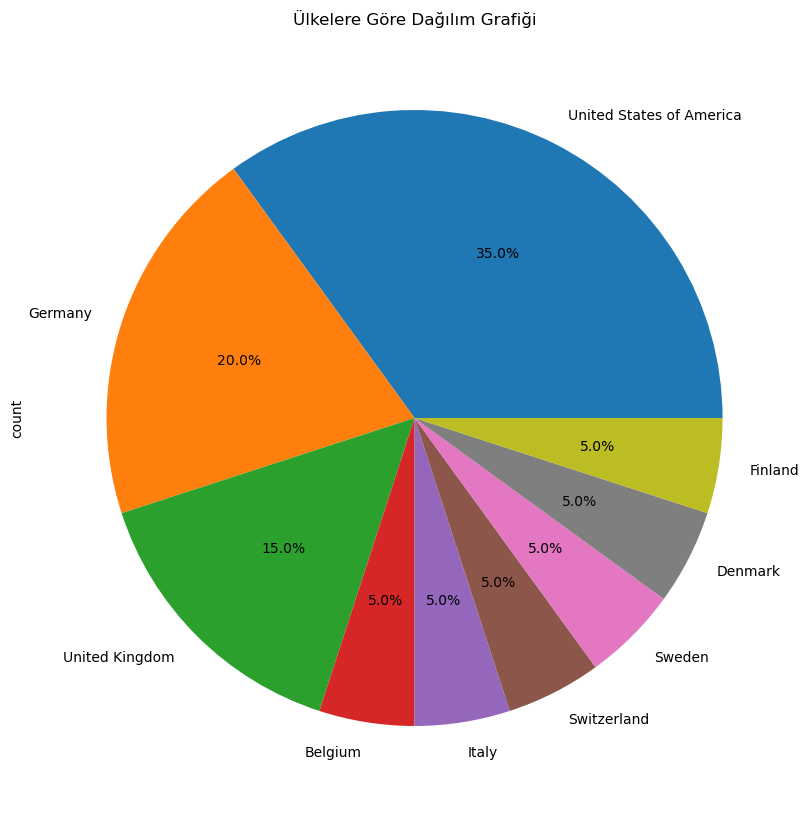

In [88]:
# Ülkelere göre dağılım grafiği
plt.figure(figsize=(15, 10))
df_yeni['organization_country'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title('Ülkelere Göre Dağılım Grafiği')
plt.show()

## 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)

In [91]:
df_temp = df[(df["year"]>=1947) & (df["year"]<=1991)]

In [92]:
df_temp.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
232,1947,Chemistry,The Nobel Prize in Chemistry 1947,"""for his investigations on plant products of b...",1/1,207,Individual,Sir Robert Robinson,1886-09-13,"Rufford, near Chesterfield",United Kingdom,Male,University of Oxford,Oxford,United Kingdom,1975-02-08,Great Missenden,United Kingdom
233,1947,Literature,The Nobel Prize in Literature 1947,"""for his comprehensive and artistically signif...",1/1,618,Individual,André Paul Guillaume Gide,1869-11-22,Paris,France,Male,NaN,NaN,NaN,1951-02-19,Paris,France
234,1947,Medicine,The Nobel Prize in Physiology or Medicine 1947,"""for their discovery of the course of the cata...",1/4,343,Individual,Carl Ferdinand Cori,1896-12-05,Prague,Austria-Hungary (Czech Republic),Male,Washington University,"St. Louis, MO",United States of America,1984-10-20,"Cambridge, MA",United States of America


In [93]:
df_temp["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [94]:
df_temp = df_temp[["category", "organization_country"]]

In [95]:
df_temp.isnull().sum()

category                 0
organization_country    93
dtype: int64

In [96]:
df_temp=df_temp.dropna()

In [97]:
unique_categories = df_temp["category"].unique()

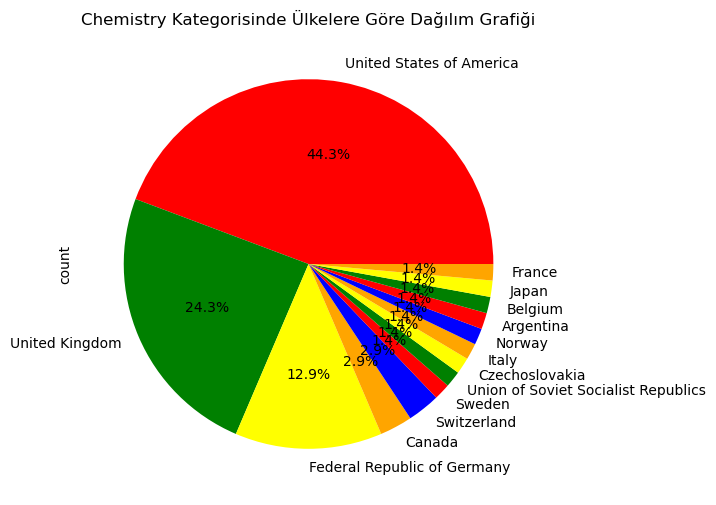

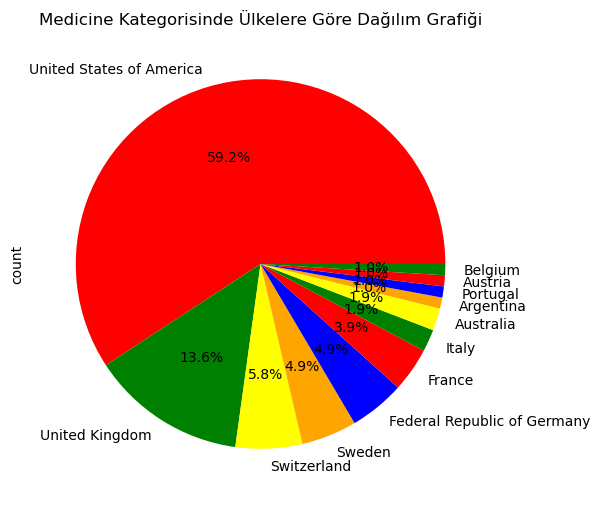

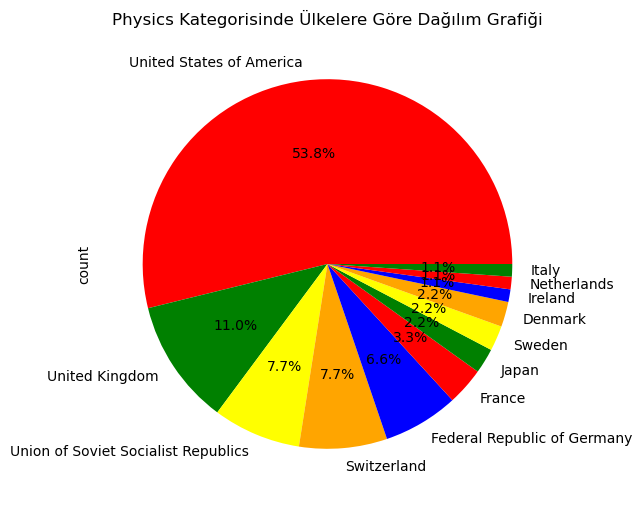

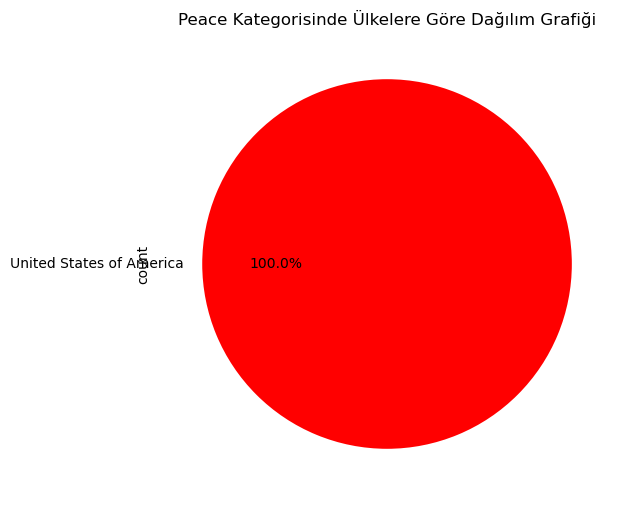

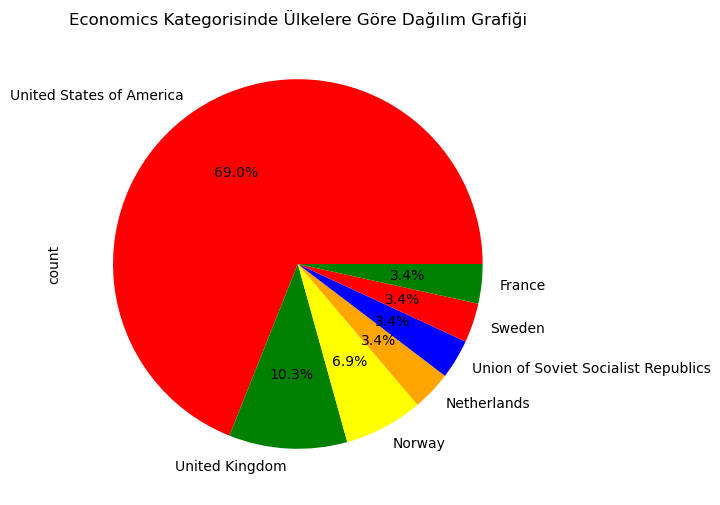

In [98]:
for i in unique_categories:
    plt.figure(figsize=(10, 6))
    df_i = df_temp[df_temp["category"] == i]
    df_i['organization_country'].value_counts().plot(kind='pie', autopct="%1.1f%%", colors=['red','green','yellow','orange', 'blue'])
    plt.title(str(i) + ' Kategorisinde Ülkelere Göre Dağılım Grafiği')
    plt.show()

In [101]:
df[df["category"]== "Peace"]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,913,Individual,Kailash Satyarthi,1954-01-11,Vidisha,India,Male,NaN,NaN,NaN,NaN,NaN,NaN
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,925,Organization,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


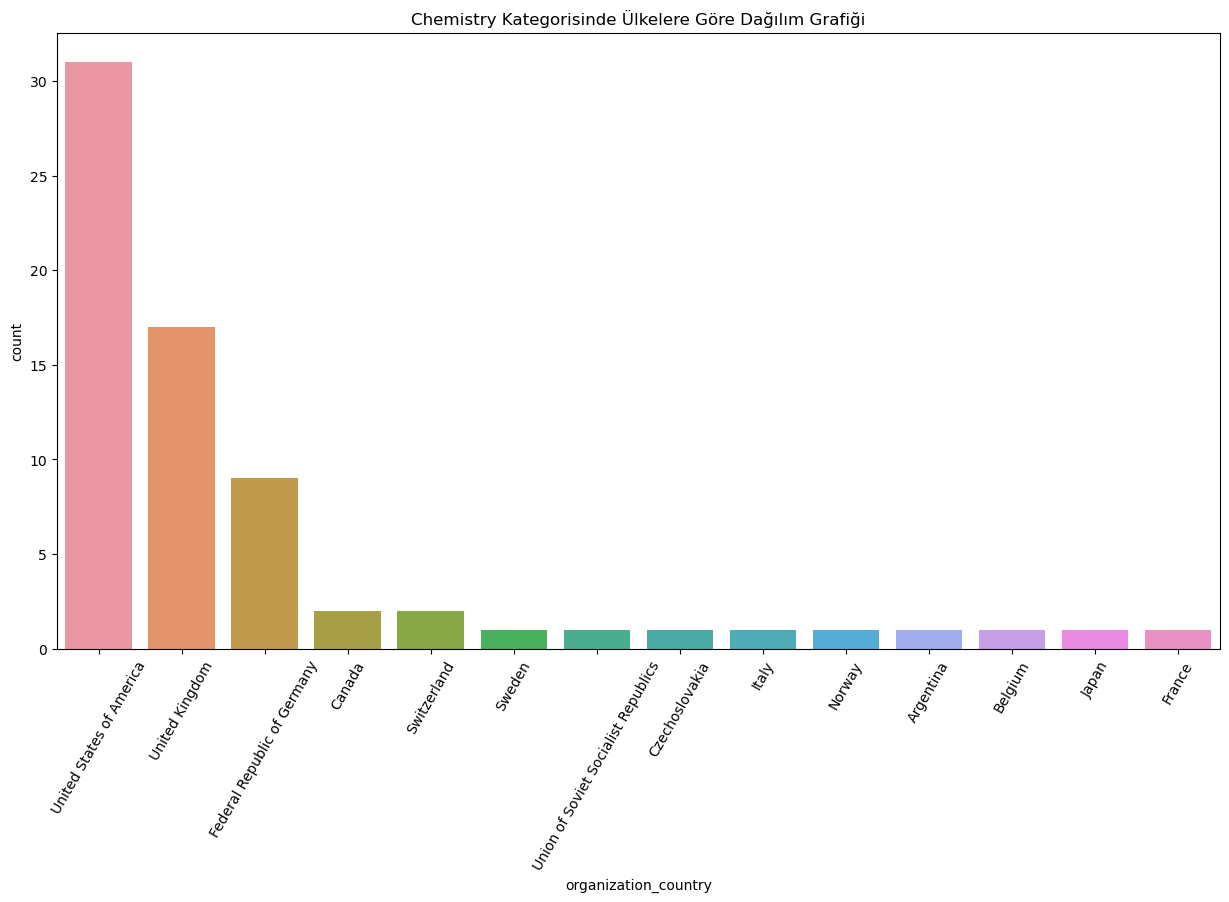

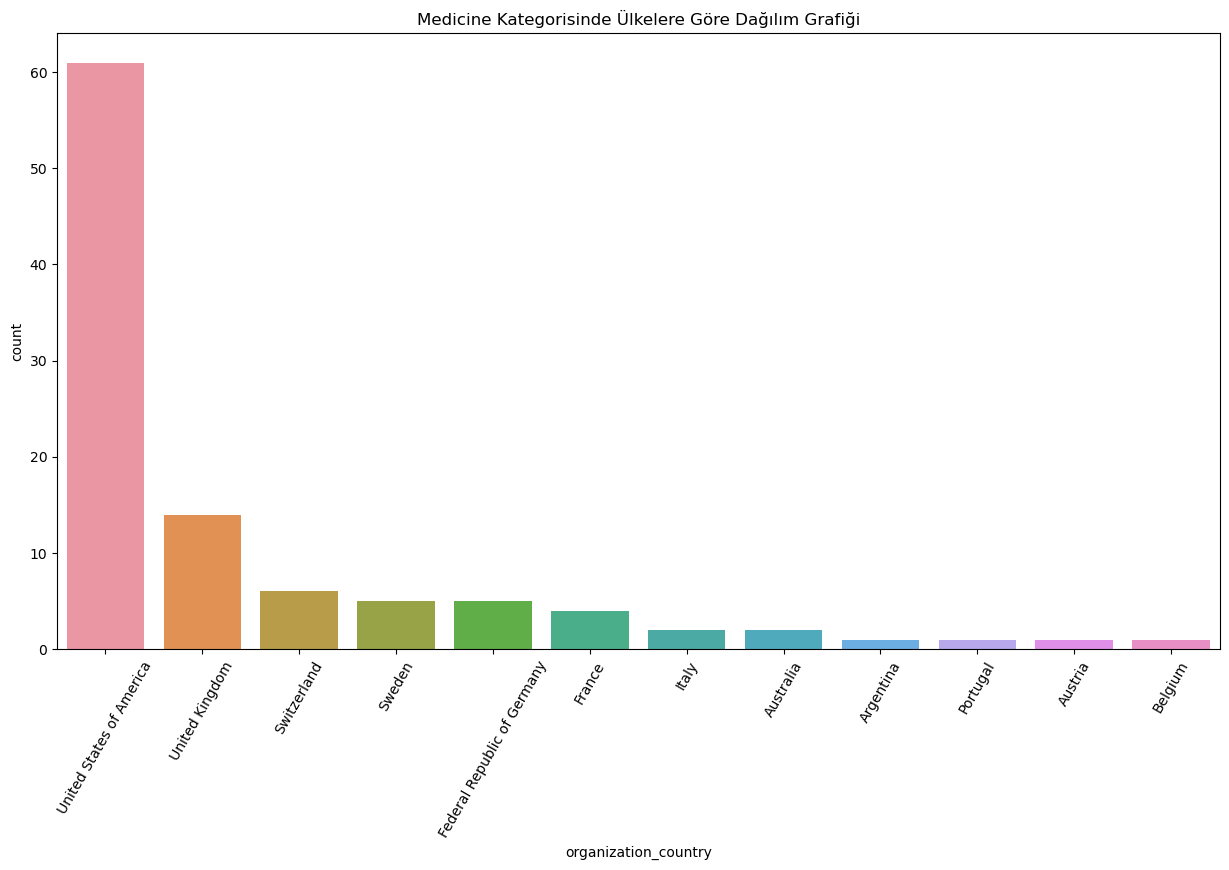

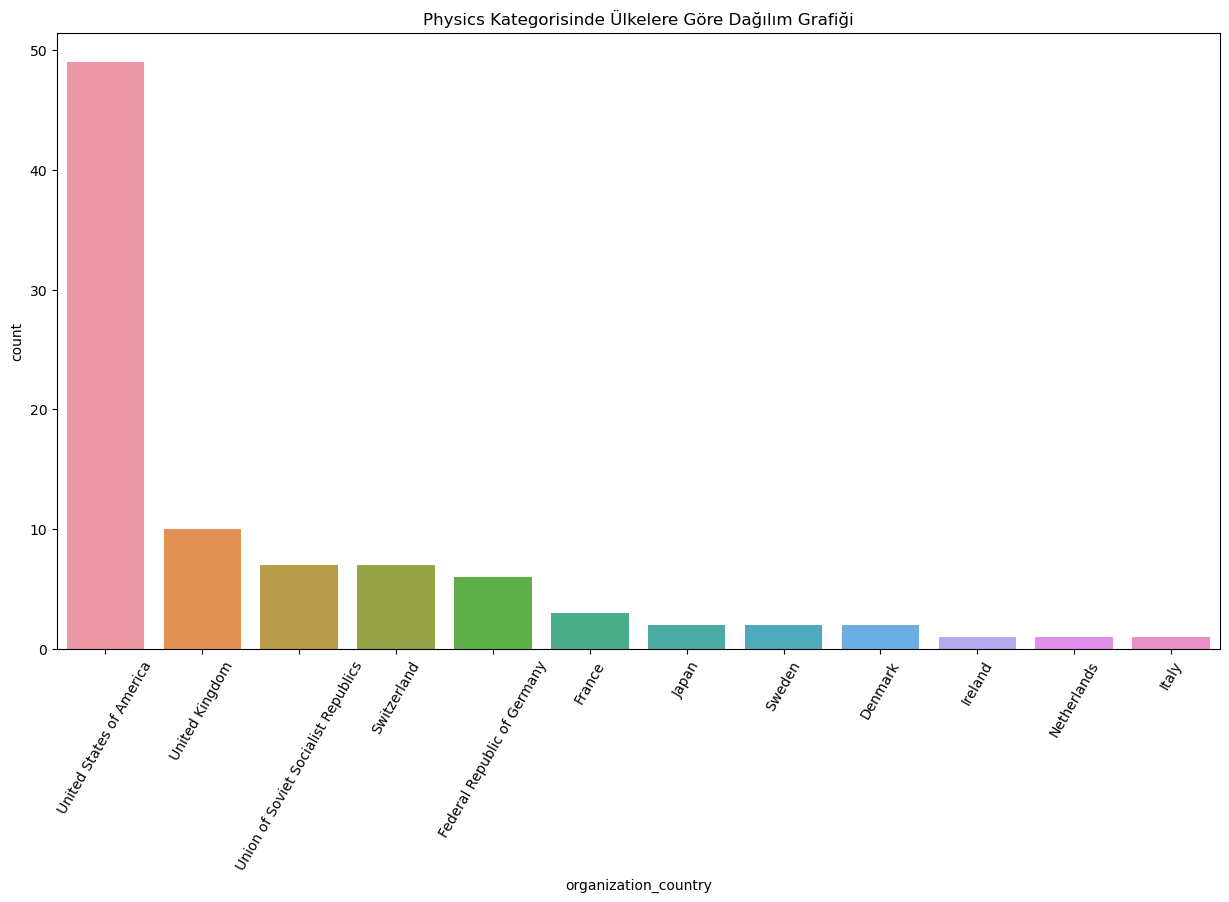

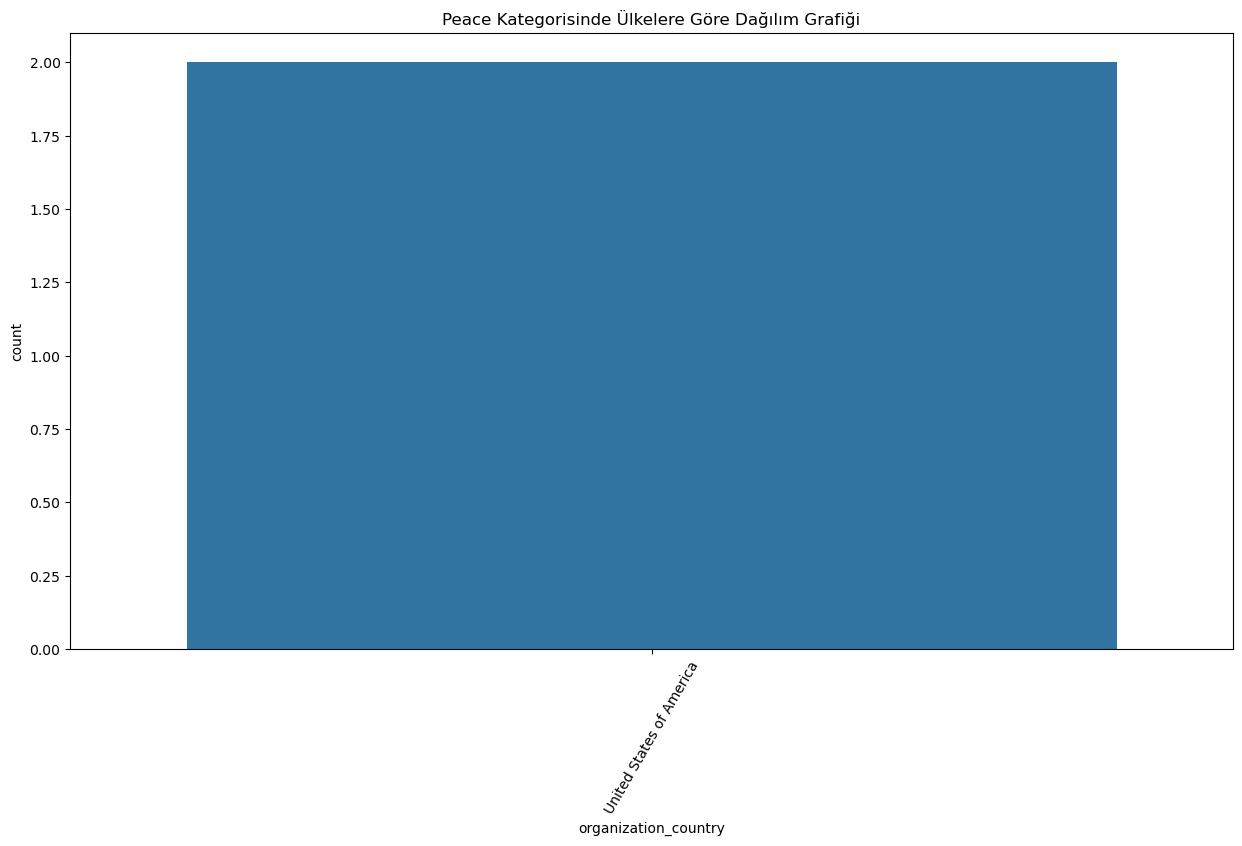

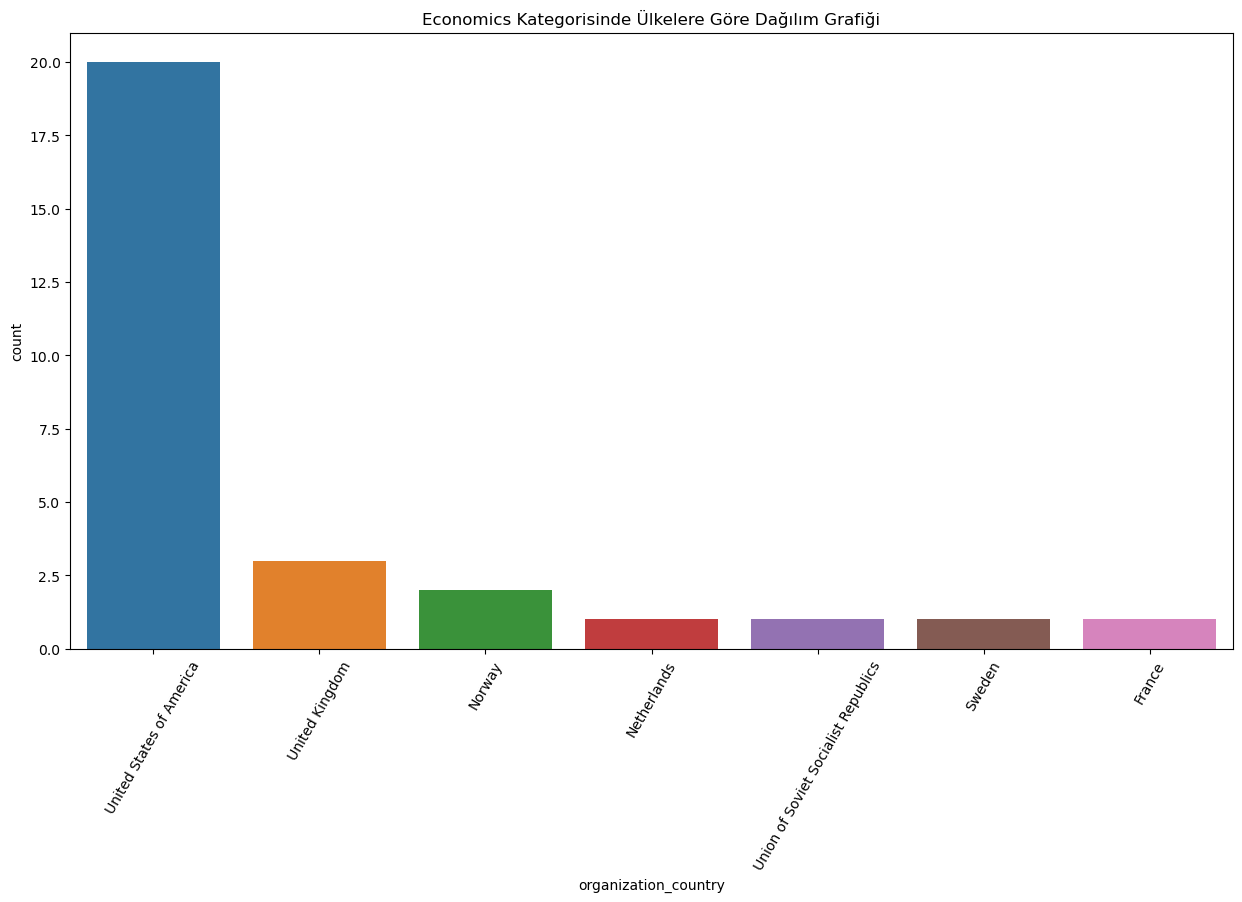

In [100]:
for i in unique_categories:
    plt.figure(figsize=(15, 8))
    df_i = df_temp[df_temp["category"] == i]
    country_counts = df_i["organization_country"].value_counts()
    sns.barplot(x=country_counts.index, y=country_counts)
    
    plt.title(str(i) + ' Kategorisinde Ülkelere Göre Dağılım Grafiği')
    plt.xticks(rotation = 60)
    plt.show()
    


## Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.

In [104]:
df_temp_kat = df[~(df["category"] == "Economics")]

In [105]:
df_temp_kat["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics'],
      dtype=object)

In [106]:
df_temp_kat = df_temp_kat[df_temp_kat["year"]>=2000]

In [107]:
df_temp_kat = df_temp_kat [["category","year","birth_date","organization_country"]]

In [108]:
df_temp_kat.isnull().sum()

category                 0
year                     0
birth_date               9
organization_country    42
dtype: int64

In [109]:
df_temp_kat = df_temp_kat.dropna()

In [110]:
df_temp_kat["birth_date"] = pd.to_datetime(df_temp_kat["birth_date"])
df_temp_kat["birth_year"] = df_temp_kat["birth_date"].apply(lambda row : row.year)
df_temp_kat["birth_year"] = df_temp_kat["birth_year"].astype(int)
df_temp_kat["yas"] = df_temp_kat["year"] - df_temp_kat["birth_year"]

In [111]:
df_temp_kat

,category,year,birth_date,organization_country,birth_year,yas
706,Chemistry,2000,1936-01-22,United States of America,1936,64
707,Chemistry,2000,1927-04-14,United States of America,1927,73
708,Chemistry,2000,1936-08-20,Japan,1936,64
712,Medicine,2000,1923-01-25,Sweden,1923,77
713,Medicine,2000,1925-12-11,United States of America,1925,75
...,...,...,...,...,...,...
902,Chemistry,2016,1951-05-18,Netherlands,1951,65
906,Medicine,2016,1945-02-09,Japan,1945,71
908,Physics,2016,1934-09-21,United States of America,1934,82
909,Physics,2016,1951-09-14,United States of America,1951,65


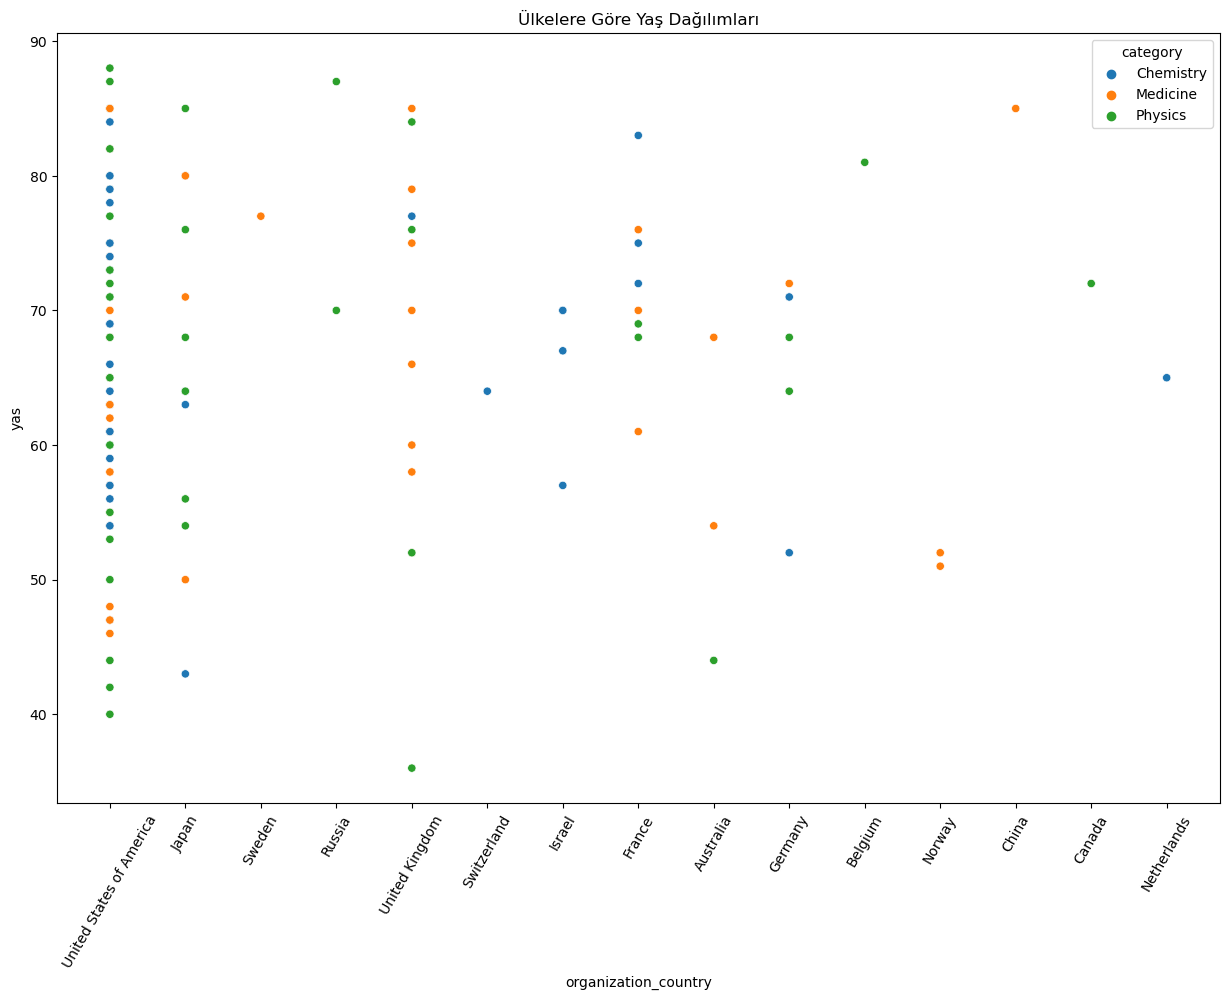

In [112]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_temp_kat, x='organization_country', y='yas', hue = 'category')
plt.title('Ülkelere Göre Yaş Dağılımları')
plt.xticks(rotation = 60);

In [113]:
df_temp_kat["category"].unique()

array(['Chemistry', 'Medicine', 'Physics'], dtype=object)